In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python import keras
from pennylane import numpy as np
from pennylane.templates import RandomLayers

In [63]:
q_train_images_angle_500 = np.load('./quanvolution/q_train_images_angle_500.npy')
q_test_images_angle_100 = np.load('./quanvolution/q_test_images_angle_100.npy')

q_train_images_threshold_500 = np.load('./quanvolution/q_train_images_threshold_500.npy')
q_test_images_threshold_100 = np.load('./quanvolution/q_test_images_threshold_100.npy')

q_train_images_higher_order_500 = np.load('./quanvolution/q_train_images_higher_order_500.npy')
q_test_images_higher_order_100 = np.load('./quanvolution/q_test_images_higher_order_100.npy')

q_train_images_angle_noisy_500 = np.load('./quanvolution/q_train_images_angle_noisy_500.npy')
q_test_images_angle_noisy_100 = np.load('./quanvolution/q_test_images_angle_noisy_100.npy')

q_train_images_threshold_noisy_500 = np.load('./quanvolution/q_train_images_threshold_noisy_500.npy')
q_test_images_threshold_noisy_100 = np.load('./quanvolution/q_test_images_threshold_noisy_100.npy')

q_train_images_higher_order_noisy_500 = np.load('./quanvolution/q_train_images_higher_order_noisy_500.npy')
q_test_images_higher_order_noisy_100 = np.load('./quanvolution/q_test_images_higher_order_noisy_100.npy')

# q_train_images_angle_200 = np.load('./quanvolution/angle_encoding_200.npy')
# q_test_images_angle_100 = np.load('./quanvolution/angle_encoding_100.npy')

# q_train_1000 = np.load('./quanvolution/q_train_images_threshold_1000.npy')
# q_test_1000 = np.load('./quanvolution/q_train_images_angle_1000.npy')

x_train = np.load('./x_train.npy')
x_test = np.load('./x_test.npy')
y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')

In [64]:
q_table_images_angle_500 = q_train_images_angle_500[401:500]
q_table_images_angle_noisy_500 = q_train_images_angle_noisy_500[401:500]
q_table_images_higher_order_500 = q_train_images_higher_order_500[401:500]
q_table_images_higher_order_noisy_500 = q_train_images_higher_order_noisy_500[401:500]
q_table_images_threshold_500 = q_train_images_threshold_500[401:500]
q_table_images_threshold_noisy_500 = q_train_images_threshold_noisy_500[401:500]

q_train_images_angle_500 = q_train_images_angle_500[:400]
q_train_images_threshold_500 = q_train_images_threshold_500[:400]
q_train_images_higher_order_500 = q_train_images_higher_order_500[:400]

q_train_images_angle_noisy_500 = q_train_images_angle_noisy_500[:400]
q_train_images_threshold_noisy_500 = q_train_images_threshold_noisy_500[:400]
q_train_images_higher_order_noisy_500 = q_train_images_higher_order_noisy_500[:400]



In [7]:
def qmodel():
  """Initializes and returns a Keras model to be trained"""

  model = keras.models.Sequential()

  #quanvolutional layer

  # convolution 2
  model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), strides=2, activation='relu'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Dropout(0.5)) 

  #convolution 3
  model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Flatten())

  # Possibility to add Fully connected layer, following the dropout layer here
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))

  #Fully connected layer
  model.add(keras.layers.Dense(2, activation='softmax'))


  model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"],
  )

  return model

In [8]:
def cmodel():
  """Initializes and returns a Keras model to be trained"""

  model = keras.models.Sequential()

  #quanvolution-like convolutional layer
  model.add(keras.layers.Conv2D(4, kernel_size=(2, 2),  strides=2, trainable=False))

  #convolution 2
  model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), strides=2, activation='relu'))
  model.add(keras.layers.MaxPooling2D((2, 2)))
  model.add(keras.layers.Dropout(0.5)) 

  # # #convolution 3
  model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Flatten())

  #Possibility to add Fully connected layer, following the dropout layer here
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.2))

  #Fully connected layer
  model.add(keras.layers.Dense(2, activation='softmax'))


  model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"],
  )

  return model



In [111]:
c_model = cmodel()

c_history = c_model.fit(x_train[:400], y_train[:400],
                        validation_data=(x_test[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.6116 - accuracy: 0.7125 - val_loss: 0.6784 - val_accuracy: 0.6200
Epoch 2/30
13/13 - 0s - loss: 0.5769 - accuracy: 0.7475 - val_loss: 0.6837 - val_accuracy: 0.6200
Epoch 3/30
13/13 - 0s - loss: 0.5738 - accuracy: 0.7475 - val_loss: 0.6741 - val_accuracy: 0.6200
Epoch 4/30
13/13 - 0s - loss: 0.5784 - accuracy: 0.7475 - val_loss: 0.6769 - val_accuracy: 0.6200
Epoch 5/30
13/13 - 0s - loss: 0.5648 - accuracy: 0.7475 - val_loss: 0.6716 - val_accuracy: 0.6200
Epoch 6/30
13/13 - 0s - loss: 0.5519 - accuracy: 0.7475 - val_loss: 0.6657 - val_accuracy: 0.6200
Epoch 7/30
13/13 - 0s - loss: 0.5578 - accuracy: 0.7475 - val_loss: 0.6545 - val_accuracy: 0.6200
Epoch 8/30
13/13 - 0s - loss: 0.5474 - accuracy: 0.7550 - val_loss: 0.6424 - val_accuracy: 0.6200
Epoch 9/30
13/13 - 0s - loss: 0.5239 - accuracy: 0.7375 - val_loss: 0.6342 - val_accuracy: 0.6200
Epoch 10/30
13/13 - 0s - loss: 0.5036 - accuracy: 0.7425 - val_loss: 0.6101 - val_accuracy: 0.6600
Epoch 11/30
13/13 -

In [112]:
q_model_angle = qmodel()

q_history_angle = q_model_angle.fit(q_train_images_angle_500, y_train[:400],
                        validation_data=(q_test_images_angle_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.8063 - accuracy: 0.6300 - val_loss: 0.6971 - val_accuracy: 0.4800
Epoch 2/30
13/13 - 0s - loss: 0.5884 - accuracy: 0.7150 - val_loss: 0.6599 - val_accuracy: 0.6200
Epoch 3/30
13/13 - 0s - loss: 0.5733 - accuracy: 0.7475 - val_loss: 0.6575 - val_accuracy: 0.6200
Epoch 4/30
13/13 - 0s - loss: 0.5386 - accuracy: 0.7475 - val_loss: 0.6422 - val_accuracy: 0.6200
Epoch 5/30
13/13 - 0s - loss: 0.5218 - accuracy: 0.7525 - val_loss: 0.6307 - val_accuracy: 0.6700
Epoch 6/30
13/13 - 0s - loss: 0.4890 - accuracy: 0.7625 - val_loss: 0.6058 - val_accuracy: 0.7900
Epoch 7/30
13/13 - 0s - loss: 0.4382 - accuracy: 0.7875 - val_loss: 0.5537 - val_accuracy: 0.8400
Epoch 8/30
13/13 - 0s - loss: 0.3675 - accuracy: 0.8300 - val_loss: 0.4990 - val_accuracy: 0.8700
Epoch 9/30
13/13 - 0s - loss: 0.3608 - accuracy: 0.8425 - val_loss: 0.4885 - val_accuracy: 0.7900
Epoch 10/30
13/13 - 0s - loss: 0.3542 - accuracy: 0.8275 - val_loss: 0.4164 - val_accuracy: 0.8500
Epoch 11/30
13/13 -

In [113]:
q_model_angle_noisy = qmodel()

q_history_angle_noisy = q_model_angle_noisy.fit(q_train_images_angle_noisy_500, y_train[:400],
                        validation_data=(q_test_images_angle_noisy_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.6448 - accuracy: 0.6975 - val_loss: 0.6615 - val_accuracy: 0.6200
Epoch 2/30
13/13 - 0s - loss: 0.5730 - accuracy: 0.7475 - val_loss: 0.6483 - val_accuracy: 0.6200
Epoch 3/30
13/13 - 0s - loss: 0.5338 - accuracy: 0.7475 - val_loss: 0.6215 - val_accuracy: 0.6400
Epoch 4/30
13/13 - 0s - loss: 0.4771 - accuracy: 0.7725 - val_loss: 0.6080 - val_accuracy: 0.7200
Epoch 5/30
13/13 - 0s - loss: 0.3899 - accuracy: 0.8200 - val_loss: 0.5179 - val_accuracy: 0.7700
Epoch 6/30
13/13 - 0s - loss: 0.3600 - accuracy: 0.8325 - val_loss: 0.4581 - val_accuracy: 0.8000
Epoch 7/30
13/13 - 0s - loss: 0.2972 - accuracy: 0.8675 - val_loss: 0.4370 - val_accuracy: 0.7900
Epoch 8/30
13/13 - 0s - loss: 0.2768 - accuracy: 0.8800 - val_loss: 0.4551 - val_accuracy: 0.8300
Epoch 9/30
13/13 - 0s - loss: 0.2738 - accuracy: 0.8625 - val_loss: 0.4179 - val_accuracy: 0.8400
Epoch 10/30
13/13 - 0s - loss: 0.2562 - accuracy: 0.9025 - val_loss: 0.4480 - val_accuracy: 0.7400
Epoch 11/30
13/13 -

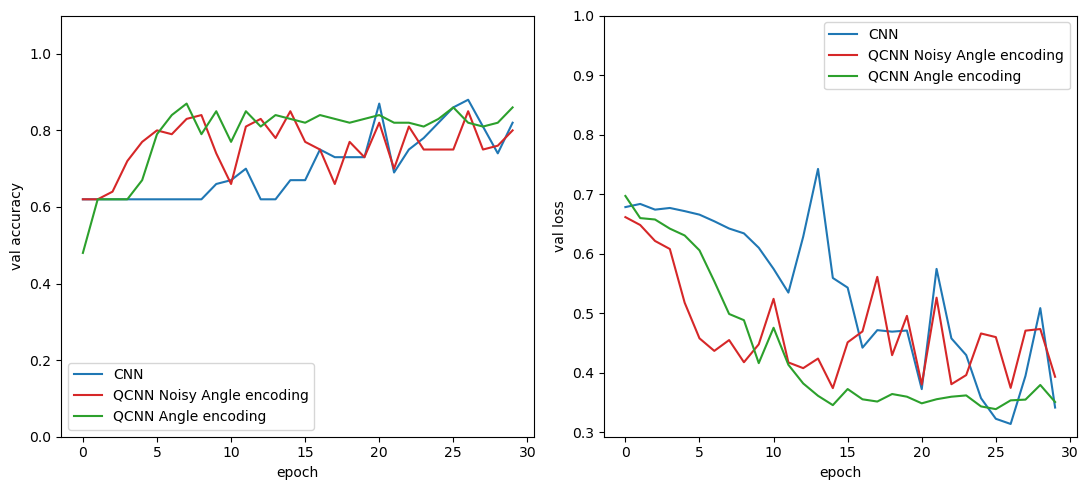

In [114]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["val_accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_angle_noisy.history["val_accuracy"], "tab:red", label="QCNN Noisy Angle encoding", linestyle="-", marker="",)
ax1.plot(q_history_angle.history["val_accuracy"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("val accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["val_loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_angle_noisy.history["val_loss"], "tab:red", label="QCNN Noisy Angle encoding", linestyle="-", marker="",)
ax2.plot(q_history_angle.history["val_loss"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("val loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot_angle.png', dpi=200, facecolor='w')
plt.show()

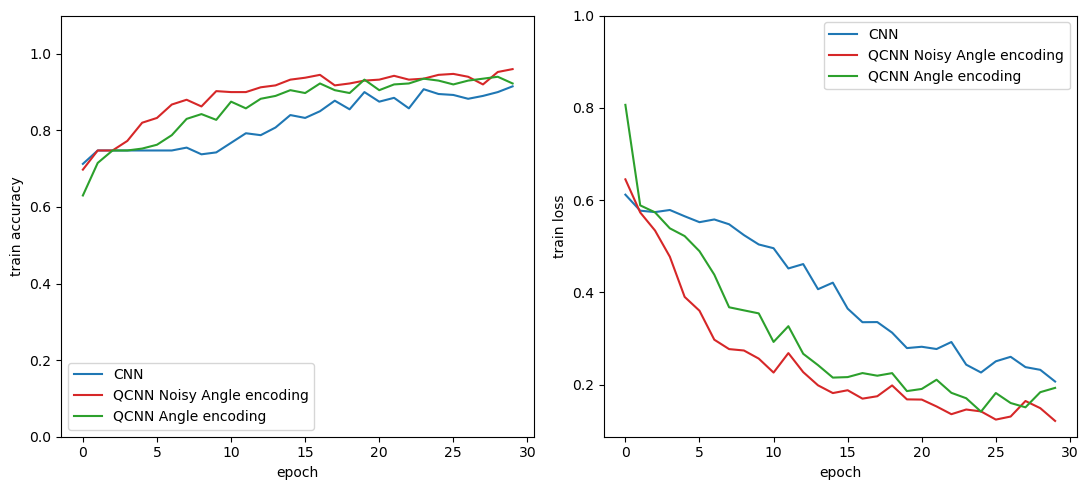

In [126]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_angle_noisy.history["accuracy"], "tab:red", label="QCNN Noisy Angle encoding", linestyle="-", marker="",)
ax1.plot(q_history_angle.history["accuracy"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("train accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_angle_noisy.history["loss"], "tab:red", label="QCNN Noisy Angle encoding", linestyle="-", marker="",)
ax2.plot(q_history_angle.history["loss"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("train loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot_angle.png', dpi=200, facecolor='w')
plt.show()

In [115]:
q_model_threshold = qmodel()

q_history_threshold = q_model_threshold.fit(q_train_images_threshold_500, y_train[:400],
                        validation_data=(q_test_images_threshold_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.7821 - accuracy: 0.6575 - val_loss: 0.6960 - val_accuracy: 0.6200
Epoch 2/30
13/13 - 0s - loss: 0.5873 - accuracy: 0.7550 - val_loss: 0.6436 - val_accuracy: 0.6500
Epoch 3/30
13/13 - 0s - loss: 0.5352 - accuracy: 0.7600 - val_loss: 0.6161 - val_accuracy: 0.6300
Epoch 4/30
13/13 - 0s - loss: 0.5113 - accuracy: 0.7525 - val_loss: 0.5870 - val_accuracy: 0.8100
Epoch 5/30
13/13 - 0s - loss: 0.4510 - accuracy: 0.7875 - val_loss: 0.5145 - val_accuracy: 0.8000
Epoch 6/30
13/13 - 0s - loss: 0.4080 - accuracy: 0.8200 - val_loss: 0.4496 - val_accuracy: 0.8400
Epoch 7/30
13/13 - 0s - loss: 0.3960 - accuracy: 0.8300 - val_loss: 0.4475 - val_accuracy: 0.8700
Epoch 8/30
13/13 - 0s - loss: 0.3271 - accuracy: 0.8725 - val_loss: 0.4171 - val_accuracy: 0.8600
Epoch 9/30
13/13 - 0s - loss: 0.3452 - accuracy: 0.8425 - val_loss: 0.4171 - val_accuracy: 0.8100
Epoch 10/30
13/13 - 0s - loss: 0.2932 - accuracy: 0.8700 - val_loss: 0.4099 - val_accuracy: 0.8600
Epoch 11/30
13/13 -

In [116]:
q_model_threshold_noisy = qmodel()

q_history_threshold_noisy = q_model_threshold_noisy.fit(q_train_images_threshold_noisy_500, y_train[:400],
                        validation_data=(q_test_images_threshold_noisy_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.6838 - accuracy: 0.6900 - val_loss: 0.6549 - val_accuracy: 0.5900
Epoch 2/30
13/13 - 0s - loss: 0.5932 - accuracy: 0.7125 - val_loss: 0.6291 - val_accuracy: 0.6200
Epoch 3/30
13/13 - 0s - loss: 0.5522 - accuracy: 0.7300 - val_loss: 0.6102 - val_accuracy: 0.6600
Epoch 4/30
13/13 - 0s - loss: 0.5051 - accuracy: 0.7700 - val_loss: 0.5737 - val_accuracy: 0.7700
Epoch 5/30
13/13 - 0s - loss: 0.4447 - accuracy: 0.7950 - val_loss: 0.5287 - val_accuracy: 0.6700
Epoch 6/30
13/13 - 0s - loss: 0.4655 - accuracy: 0.7875 - val_loss: 0.4548 - val_accuracy: 0.8600
Epoch 7/30
13/13 - 0s - loss: 0.3888 - accuracy: 0.8100 - val_loss: 0.4496 - val_accuracy: 0.8900
Epoch 8/30
13/13 - 0s - loss: 0.3669 - accuracy: 0.8450 - val_loss: 0.3860 - val_accuracy: 0.8700
Epoch 9/30
13/13 - 0s - loss: 0.3269 - accuracy: 0.8525 - val_loss: 0.3772 - val_accuracy: 0.8400
Epoch 10/30
13/13 - 0s - loss: 0.3108 - accuracy: 0.8575 - val_loss: 0.3469 - val_accuracy: 0.8900
Epoch 11/30
13/13 -

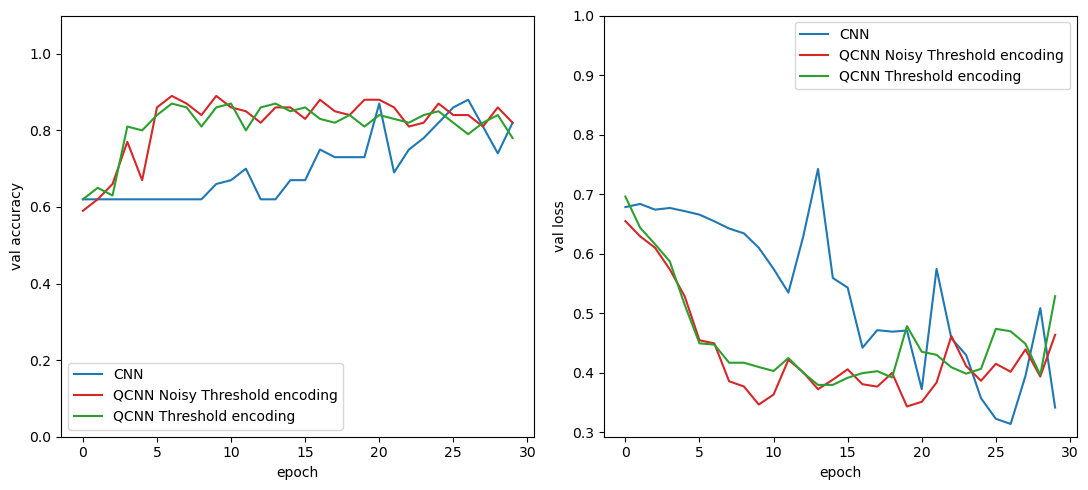

In [117]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["val_accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_threshold_noisy.history["val_accuracy"], "tab:red", label="QCNN Noisy Threshold encoding", linestyle="-", marker="",)
ax1.plot(q_history_threshold.history["val_accuracy"], "tab:green", label="QCNN Threshold encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("val accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["val_loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_threshold_noisy.history["val_loss"], "tab:red", label="QCNN Noisy Threshold encoding", linestyle="-", marker="",)
ax2.plot(q_history_threshold.history["val_loss"], "tab:green", label="QCNN Threshold encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("val loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()

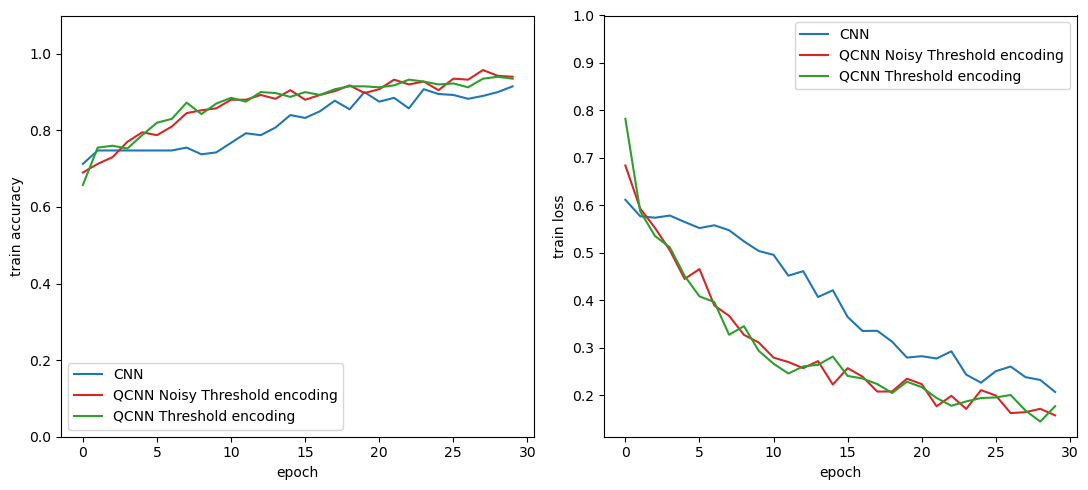

In [127]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_threshold_noisy.history["accuracy"], "tab:red", label="QCNN Noisy Threshold encoding", linestyle="-", marker="",)
ax1.plot(q_history_threshold.history["accuracy"], "tab:green", label="QCNN Threshold encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("train accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_threshold_noisy.history["loss"], "tab:red", label="QCNN Noisy Threshold encoding", linestyle="-", marker="",)
ax2.plot(q_history_threshold.history["loss"], "tab:green", label="QCNN Threshold encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("train loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()

In [118]:
q_model_higher_order = qmodel()

q_history_higher_order = q_model_higher_order.fit(q_train_images_higher_order_500, y_train[:400],
                        validation_data=(q_test_images_higher_order_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.6111 - accuracy: 0.7300 - val_loss: 0.6487 - val_accuracy: 0.6200
Epoch 2/30
13/13 - 0s - loss: 0.5408 - accuracy: 0.7525 - val_loss: 0.5989 - val_accuracy: 0.7000
Epoch 3/30
13/13 - 0s - loss: 0.5075 - accuracy: 0.7700 - val_loss: 0.5549 - val_accuracy: 0.8200
Epoch 4/30
13/13 - 0s - loss: 0.4343 - accuracy: 0.8050 - val_loss: 0.4988 - val_accuracy: 0.8300
Epoch 5/30
13/13 - 0s - loss: 0.4055 - accuracy: 0.8100 - val_loss: 0.4667 - val_accuracy: 0.8500
Epoch 6/30
13/13 - 0s - loss: 0.3485 - accuracy: 0.8575 - val_loss: 0.4643 - val_accuracy: 0.8100
Epoch 7/30
13/13 - 0s - loss: 0.2913 - accuracy: 0.8750 - val_loss: 0.4734 - val_accuracy: 0.8200
Epoch 8/30
13/13 - 0s - loss: 0.2719 - accuracy: 0.8875 - val_loss: 0.4544 - val_accuracy: 0.8300
Epoch 9/30
13/13 - 0s - loss: 0.2859 - accuracy: 0.8950 - val_loss: 0.5499 - val_accuracy: 0.8300
Epoch 10/30
13/13 - 0s - loss: 0.2165 - accuracy: 0.9300 - val_loss: 0.4909 - val_accuracy: 0.8500
Epoch 11/30
13/13 -

In [119]:
q_model_higher_order_noisy = qmodel()

q_history_higher_order_noisy = q_model_higher_order_noisy.fit(q_train_images_higher_order_noisy_500, y_train[:400],
                        validation_data=(q_test_images_higher_order_noisy_100[:100], y_test[:100]),
                        batch_size=32, epochs=30, verbose=2)

Epoch 1/30
13/13 - 0s - loss: 0.6370 - accuracy: 0.6900 - val_loss: 0.6510 - val_accuracy: 0.6200
Epoch 2/30
13/13 - 0s - loss: 0.5664 - accuracy: 0.7450 - val_loss: 0.6191 - val_accuracy: 0.6200
Epoch 3/30
13/13 - 0s - loss: 0.5018 - accuracy: 0.7475 - val_loss: 0.5629 - val_accuracy: 0.6200
Epoch 4/30
13/13 - 0s - loss: 0.4420 - accuracy: 0.7725 - val_loss: 0.4691 - val_accuracy: 0.8400
Epoch 5/30
13/13 - 0s - loss: 0.3644 - accuracy: 0.8325 - val_loss: 0.4300 - val_accuracy: 0.8400
Epoch 6/30
13/13 - 0s - loss: 0.2947 - accuracy: 0.8850 - val_loss: 0.3757 - val_accuracy: 0.8500
Epoch 7/30
13/13 - 0s - loss: 0.2875 - accuracy: 0.8775 - val_loss: 0.4732 - val_accuracy: 0.8300
Epoch 8/30
13/13 - 0s - loss: 0.2445 - accuracy: 0.8875 - val_loss: 0.4599 - val_accuracy: 0.8300
Epoch 9/30
13/13 - 0s - loss: 0.2758 - accuracy: 0.8725 - val_loss: 0.4445 - val_accuracy: 0.8200
Epoch 10/30
13/13 - 0s - loss: 0.2403 - accuracy: 0.8975 - val_loss: 0.4728 - val_accuracy: 0.8400
Epoch 11/30
13/13 -

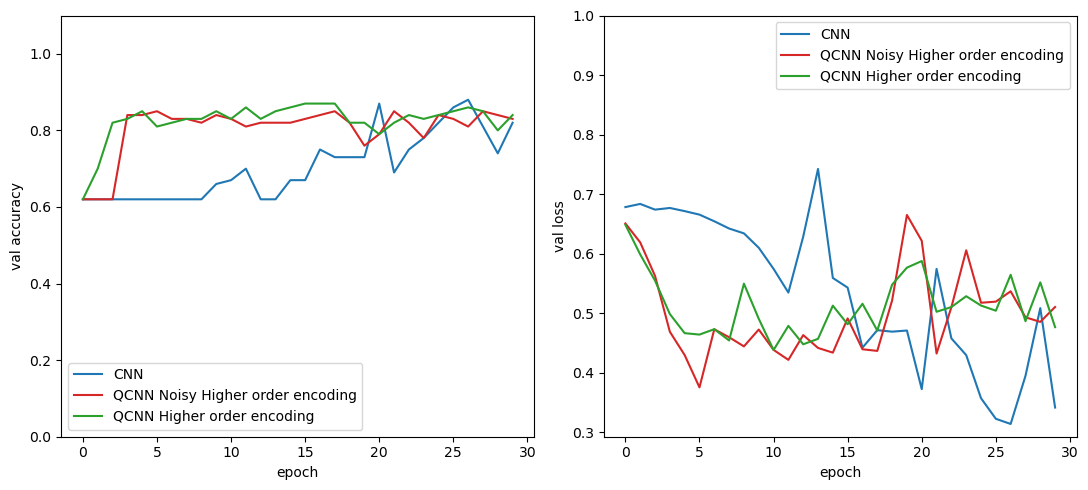

In [132]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["val_accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_higher_order_noisy.history["val_accuracy"], "tab:red", label="QCNN Noisy Higher order encoding", linestyle="-", marker="",)
ax1.plot(q_history_higher_order.history["val_accuracy"], "tab:green", label="QCNN Higher order encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("val accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["val_loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_higher_order_noisy.history["val_loss"], "tab:red", label="QCNN Noisy Higher order encoding", linestyle="-", marker="",)
ax2.plot(q_history_higher_order.history["val_loss"], "tab:green", label="QCNN Higher order encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("val loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()

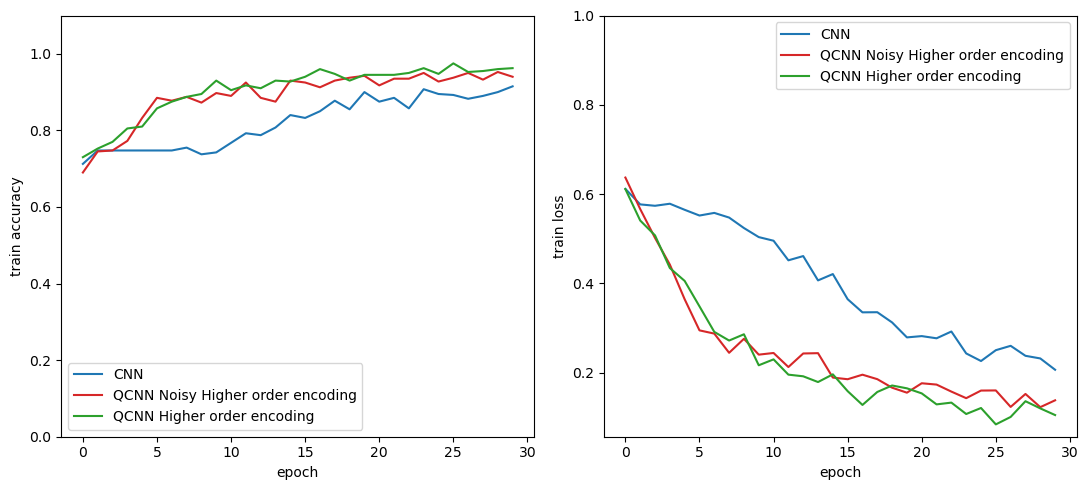

In [130]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_higher_order_noisy.history["accuracy"], "tab:red", label="QCNN Noisy Higher order encoding", linestyle="-", marker="",)
ax1.plot(q_history_higher_order.history["accuracy"], "tab:green", label="QCNN Higher order encoding", linestyle="-", marker="",)
# ax1.plot(q_history_higher_order.history["val_accuracy"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("train accuracy")
ax1.set_ylim([0, 1.1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_higher_order_noisy.history["loss"], "tab:red", label="QCNN Noisy Higher order encoding", linestyle="-", marker="",)
ax2.plot(q_history_higher_order.history["loss"], "tab:green", label="QCNN Higher order encoding", linestyle="-", marker="",)
# ax2.plot(q_history_higher_order.history["val_loss"], "-oy", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("train loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()

In [134]:
print("CNN")
c_model.evaluate(x_train[401:500], y_train[401:500], batch_size=32)

print("QCNN Angle encoding")
q_model_angle.evaluate(q_table_images_angle_500, y_train[401:500], batch_size=32)

print("QCNN Angle Noisy encoding")
q_model_angle_noisy.evaluate(q_table_images_angle_noisy_500, y_train[401:500], batch_size=32)

print("QCNN Threshold encoding")
q_model_threshold.evaluate(q_table_images_threshold_500, y_train[401:500], batch_size=32)

print("QCNN Threshold Noisy encoding")
q_model_threshold_noisy.evaluate(q_table_images_threshold_noisy_500, y_train[401:500], batch_size=32)

print("QCNN Higher Order Noisy encoding")
q_model_higher_order_noisy.evaluate(q_table_images_higher_order_noisy_500, y_train[401:500], batch_size=32)

print("QCNN Higher Order encoding")
q_model_higher_order.evaluate(q_table_images_higher_order_500, y_train[401:500], batch_size=32)

CNN
4/4 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.8889
QCNN Angle encoding
4/4 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9495
QCNN Angle Noisy encoding
4/4 [==============================] - 0s 5ms/step - loss: 0.2070 - accuracy: 0.9192
QCNN Threshold encoding
4/4 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9091
QCNN Threshold Noisy encoding
4/4 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9091
QCNN Higher Order Noisy encoding
4/4 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8788
QCNN Higher Order encoding
4/4 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.9091


[0.2439684271812439, 0.9090909361839294]

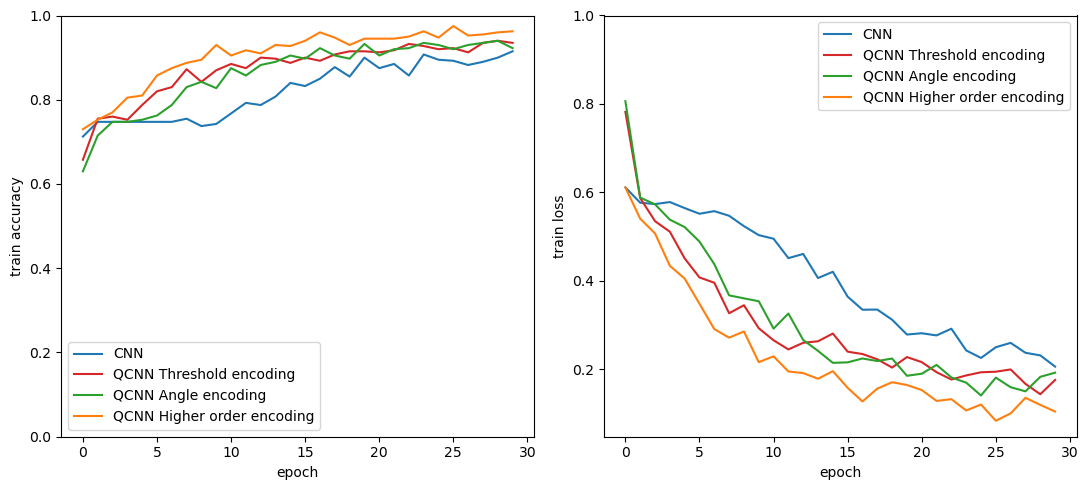

In [122]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_threshold.history["accuracy"], "tab:red", label="QCNN Threshold encoding", linestyle="-", marker="",)
ax1.plot(q_history_angle.history["accuracy"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
ax1.plot(q_history_higher_order.history["accuracy"], "tab:orange", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("train accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_threshold.history["loss"], "tab:red", label="QCNN Threshold encoding", linestyle="-", marker="",)
ax2.plot(q_history_angle.history["loss"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
ax2.plot(q_history_higher_order.history["loss"], "tab:orange", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("train loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()

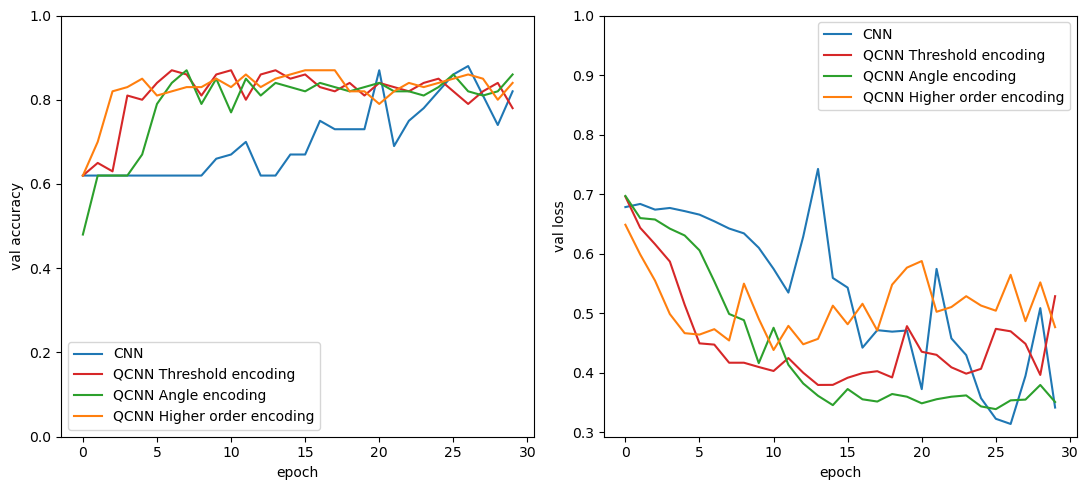

In [123]:
plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.plot(c_history.history["val_accuracy"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax1.plot(q_history_threshold.history["val_accuracy"], "tab:red", label="QCNN Threshold encoding", linestyle="-", marker="",)
ax1.plot(q_history_angle.history["val_accuracy"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
ax1.plot(q_history_higher_order.history["val_accuracy"], "tab:orange", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax1.set_ylabel("val accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("epoch")
ax1.legend(loc="lower left")

ax2.plot(c_history.history["val_loss"], "tab:blue", label="CNN", linestyle="-", marker="",)
ax2.plot(q_history_threshold.history["val_loss"], "tab:red", label="QCNN Threshold encoding", linestyle="-", marker="",)
ax2.plot(q_history_angle.history["val_loss"], "tab:green", label="QCNN Angle encoding", linestyle="-", marker="",)
ax2.plot(q_history_higher_order.history["val_loss"], "tab:orange", label="QCNN Higher order encoding", linestyle="-", marker="",)
ax2.set_ylabel("val loss")
ax2.set_ylim(top=1)
ax2.set_xlabel("epoch")
ax2.legend()

plt.tight_layout()
plt.savefig('train_plot.png', dpi=200, facecolor='w')
plt.show()